# Human Capital: IBM HR Analytics Employee Attrition & Performance
This dataset is related to Human Capital field. Given some information of the employee, We would like to analyse the employees' attrition in the organization.

source of dataset can be seen  [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup

In [2]:
!pip install pgmpy
!pip install plotly

     |████████████████████████████████| 337kB 25.9MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pgmpy
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import model_selection
import tensorflow as tf
from sklearn import preprocessing, metrics
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import plotly
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_excel('/content/WA_Fn-UseC_-HR-Employee-Attrition.xls')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

Drop the uneccessary variable

In [7]:
data=df.drop(columns=['EmployeeNumber'])
data.shape

(1470, 34)

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis
From the dataset, we use the attrition variable as the respon/ prediction  and another variables as the predictor

In [9]:
preds=data.drop(columns=['Attrition'])
resp=data['Attrition']

Get the numerical and categorical variables for better analysis


In [10]:
categorical=[]
for col in preds.columns:
  if preds[col].dtype=='O':
    add=col
    categorical.append(add)


In [11]:
#There are variables which are encoded by default
extras = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel' ,'JobSatisfaction',
             'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked',
             'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear']


categorical = categorical + extras
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'PercentSalaryHike',
 'TrainingTimesLastYear']

In [12]:
numerics=[]
for col in preds.columns:
  if col not in categorical:
    add=col
    numerics.append(add)

numerics

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'StandardHours',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Check the correlation between each variable of predictor for numerical variables

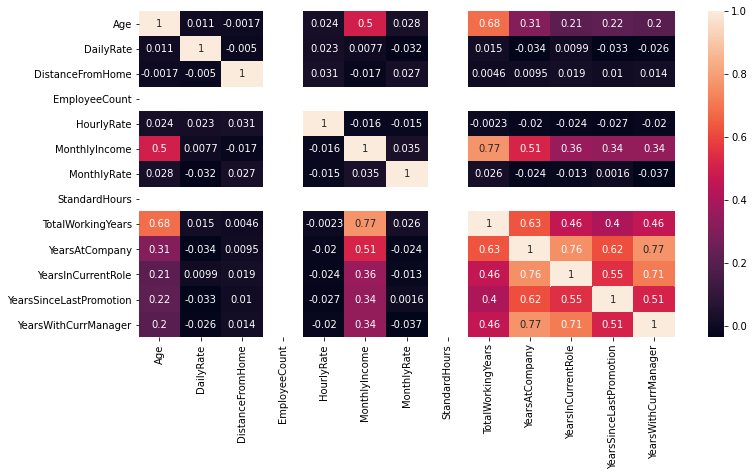

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numerics].corr(), annot=True)

Lets see some boxplots from numeric variables

In [14]:
preds["TotalWorkingYears"]

0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64

In [15]:
trace0 = go.Violin(
    name = "TotalWorkingYears",
    y = preds["TotalWorkingYears"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)

trace1 = go.Violin(
    name = "Age",
    y = preds["Age"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)

trace2 = go.Violin(
    name = "YearsAtCompany",
    y = preds["YearsAtCompany"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)
layout = go.Layout(
    autosize=False,
    width=700,
    height=500
)
data = [trace0, trace1, trace2 ]
fig = go.Figure(data=data, layout=layout)
#plotly.offline.iplot(data)
fig.show()

In [16]:
# Loyality_boxplot

trace0 = go.Violin(
    name = "YearsAtCompany",
    y = preds["YearsAtCompany"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )


trace1 = go.Violin(
    name = "YearsWithCurrManager",
    y = preds["YearsWithCurrManager"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)

trace2 = go.Violin(
    name = "YearsInCurrentRole",
    y = preds["YearsInCurrentRole"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)

trace3 = go.Violin(
    name = "TotalWorkingYears",
    y = preds["TotalWorkingYears"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)
layout = go.Layout(
    autosize=False,
    width=700,
    height=500
)
data = [trace0, trace1, trace2,trace3 ]
fig = go.Figure(data=data, layout=layout)
#plotly.offline.iplot(data)
fig.show()

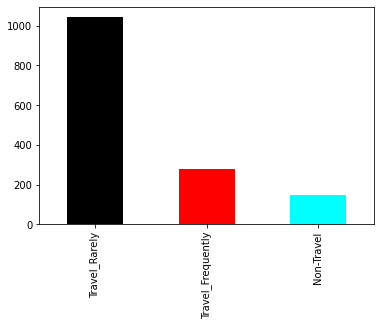

In [17]:
preds['BusinessTravel'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'cyan'])
plt.show()

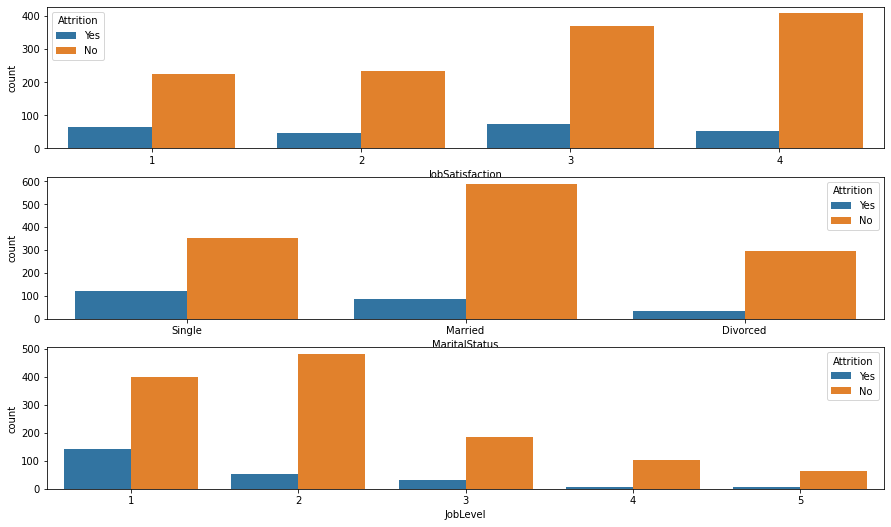

In [22]:
plt.figure(figsize=[15,12])

plt.subplot(411)
sns.countplot(x=preds['JobSatisfaction'],hue=df['Attrition'])
plt.subplot(412)
sns.countplot(x=preds['MaritalStatus'],hue=df['Attrition'])
plt.subplot(413)
sns.countplot(x=preds['JobLevel'],hue=df["Attrition"])

plt.show()

### Objective: Predict the attrition based on employees' information



Now, Lets see the stats of those highly correlated numeric variables by applying OLS regression between the variables.

As we can see, from both results we find the parameters that support the correlation between the variables (in p-value given confidence interval)

Now, We will deal with categorical data. First, we will apply one hot encoding for the dataset to have the generalization of the vector representation for each variables.

In [21]:
from sklearn.preprocessing import LabelEncoder
def onehot(dataframe):
    df=pd.get_dummies(dataframe)
    print(df.shape)
    return(df)

In [22]:
preds=onehot(preds)
#resp=onehot(resp)

(1470, 54)


We change the categorical value of our predicted variable into numerical value

In [23]:
resp = resp.replace("Yes", 1)
resp = resp.replace("No", 0)

In [24]:
# Split the dataset into train data and test data
train_x, test_x, train_y, test_y = model_selection.train_test_split(preds, resp, test_size=0.3)

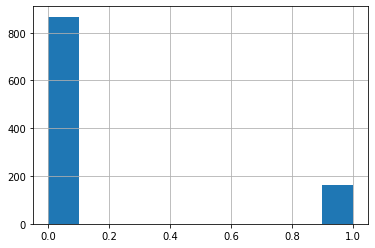

In [25]:
train_y.hist()

In [26]:
train_x.shape

(1029, 54)

# Method 1.Logistic Regression

In [27]:
lg = LogisticRegression()
model = lg.fit(train_x,train_y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [28]:
y_hat = lg.predict(test_x)

In [29]:
lg.score(test_x, test_y)

0.8321995464852607

In [30]:
lg.score(preds,resp)

0.8401360544217688

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
# predict probabilities
lg_probs = model.predict_proba(test_x)

In [33]:
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]

Logistic: ROC AUC=0.732


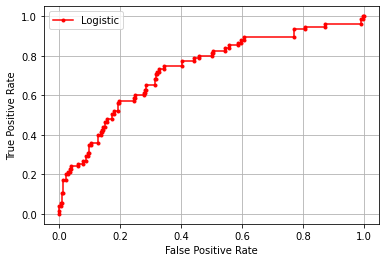

In [34]:
# calculate scores
lg_auc = roc_auc_score(test_y, lg_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lg_auc))
# calculate roc curves
lg_fpr, lg_tpr, _ = roc_curve(test_y, lg_probs)
# plot the roc curve for the model
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic',color='red')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.grid()
# show the plot
plt.show()

# Method 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
model1 = regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x)

In [37]:
regressor.score(test_x, test_y)

0.8662131519274376

In [38]:
regressor.score(preds,resp)

0.9578231292517007

In [39]:
from sklearn.metrics import plot_roc_curve

In [40]:
# predict probabilities
regressor_probs = model1.predict(test_x)

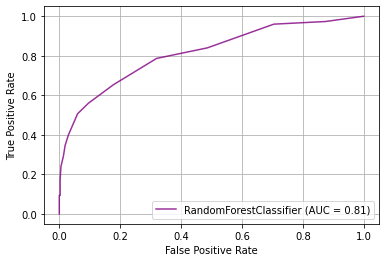

In [42]:
ax = plt.gca()
rfc_disp = plot_roc_curve(regressor, test_x, test_y, ax=ax, alpha=0.8, color='purple')
plt.grid()
plt.show()

# Method 2. Neural Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()
y_vals = enc.fit_transform(data[['Attrition']].values)

In [ ]:
y_vals

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(preds, y_vals, test_size=0.3)

In [ ]:
#Now we will standardize the data

scaler = StandardScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns) 
test_x = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

setup the model. 

In [ ]:
model = Sequential([
                  
                  Dense(128, input_dim =train_x.shape[1], activation = 'relu'),
                  #BatchNormalization(),
                  Dense(32, kernel_initializer = 'uniform', activation = 'relu'),
                  #BatchNormalization(),
                  Dense(1, activation = 'sigmoid')
  ])

model.compile(loss='BinaryCrossentropy',optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


We apply the early stoping with patience (2) regularization to address the overfitting during training

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history=model.fit(train_x,train_y,batch_size=128, epochs = 100, validation_data=(test_x,test_y), callbacks=[callback])

Epoch 1/100
9/9 [==============================] - 1s 40ms/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6451 - val_accuracy: 0.8209
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6362 - accuracy: 0.8161 - val_loss: 0.5852 - val_accuracy: 0.8481
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5750 - accuracy: 0.8495 - val_loss: 0.5396 - val_accuracy: 0.8481
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.8290 - val_loss: 0.5022 - val_accuracy: 0.8481
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5030 - accuracy: 0.8406 - val_loss: 0.4761 - val_accuracy: 0.8481
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4848 - accuracy: 0.8381 - val_loss: 0.4581 - val_accuracy: 0.8481
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4583 - accuracy: 0.8450 - val_loss: 0.4476 - val_accuracy: 0.8481
Epoch 8/100
9/9 [========

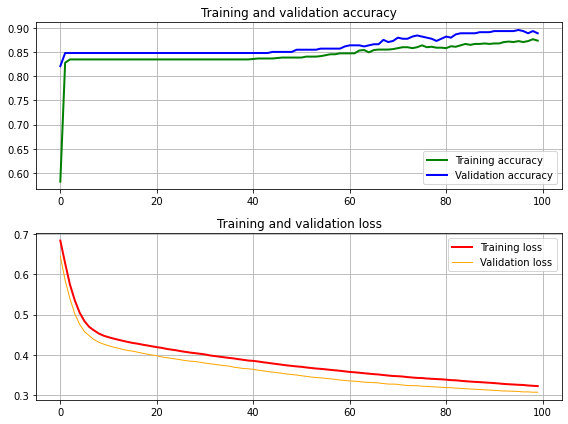

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot the accuracy and loss
fig, ax = plt.subplots(2, figsize=(8,6))

# accuracy
ax[0].grid()
ax[0].plot(epochs, acc, 'g',linewidth=2, label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b',linewidth=2, label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].grid()
ax[1].plot(epochs, loss, 'r',linewidth=2, label='Training loss')
ax[1].plot(epochs, val_loss, 'orange',linewidth=1, label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
_=fig.tight_layout()

In [ ]:
!pip install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=c7a70df0c0d2665f1053b12021773ee495d2dcc290aa23cebef1c2bc61077eec
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

# Probabilistic graphical models

Split the data into train and test


In [ ]:
data_pgm = data.sample(n=len(data), random_state=1618)

In [ ]:
# We will binarise those features which have more than 40 unique values.
nmax=40
col_list_to_bin=[]
for col in data_pgm.columns:
  print(col,':',len(data_pgm[col].unique()))
  if(len(data_pgm[col].unique())>nmax):
    col_list_to_bin.append(col)

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [ ]:
col_list_to_bin

['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

In [ ]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as pl
import time


In [ ]:
nBins=5
est=KBinsDiscretizer(n_bins=nBins, encode='ordinal',strategy='uniform')
est.fit(data_pgm[col_list_to_bin])
data_pgm[['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']]=est.transform(data_pgm[col_list_to_bin])

In [ ]:
#data_pgm=data_pgm.drop(col_list_to_bin,axis=1)
data_pgm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1344,2.0,No,Travel_Rarely,2.0,Research & Development,7,4,Medical,1,4,Male,3.0,3,2,Research Scientist,1,Married,0.0,2.0,5,Y,Yes,22,4,3,80,1,16,2,3,5,3,0,4
232,4.0,No,Travel_Rarely,2.0,Human Resources,6,2,Medical,1,2,Male,1.0,3,1,Human Resources,3,Married,0.0,4.0,8,Y,No,17,3,4,80,0,7,2,2,2,2,2,2
1060,0.0,Yes,Travel_Frequently,0.0,Research & Development,9,3,Medical,1,2,Male,4.0,3,1,Laboratory Technician,1,Single,0.0,2.0,2,Y,Yes,11,3,3,80,0,4,2,2,0,0,0,0
248,2.0,No,Travel_Rarely,3.0,Research & Development,1,2,Medical,1,3,Female,3.0,2,1,Research Scientist,1,Married,0.0,3.0,2,Y,No,14,3,1,80,1,17,2,2,3,1,0,2
1310,4.0,No,Travel_Frequently,3.0,Research & Development,15,4,Life Sciences,1,1,Male,4.0,3,4,Research Director,3,Married,3.0,3.0,2,Y,Yes,14,3,2,80,0,23,3,3,2,2,2,2


In [ ]:
#first shuffl
#data_pgm = data.sample(n=len(data), random_state=1618)
#then split
train = data_pgm[:1000]
test = data_pgm[1000:]

  0%|          | 24/1000000 [00:15<86:44:04,  3.20it/s]

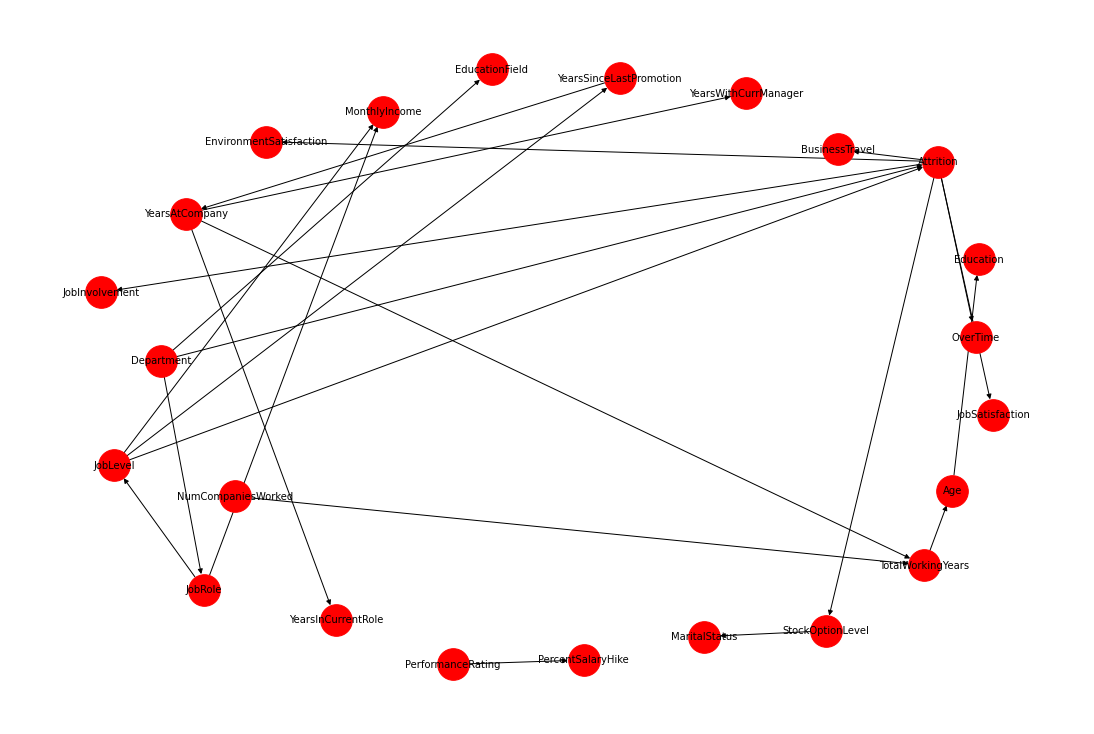

In [ ]:
hc=HillClimbSearch(train, scoring_method=BicScore(train))
best_model=hc.estimate()
edges=list(best_model.edges())
model=BayesianModel(edges)

plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=1000, node_color='red', width=1, font_size=10)
plt.show()